In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
R_BU_T01_F = 'Datasets/PKS/2022/BU-T01-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


In [3]:
R_BU_T01_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Tatortverteilung-Prozent.xlsx'
df = pd.read_excel(R_BU_T01_T,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                        'Unnamed: 4':'Tatortverteilung: 20.000 bis unter 100.000',
                        'Unnamed: 5':'Tatortverteilung: 100.000 bis unter 500.000',
                        'Unnamed: 6':'Tatortverteilung: 500.000 und mehr',
                        'Unnamed: 7':'Tatortverteilung: unbekannt'})
inhabitant_distribution = df.iloc[4,3:].rename('Einwohnerverteilung (01.01.2022) in %')
print(inhabitant_distribution)
df = df.drop(range(5)).reset_index(drop=True)
df.head()

Tatortverteilung: bis unter 20.000 Einwohner    40.576384
Tatortverteilung: 20.000 bis unter 100.000      27.494591
Tatortverteilung: 100.000 bis unter 500.000     15.072914
Tatortverteilung: 500.000 und mehr              16.856111
Tatortverteilung: unbekannt                             x
Name: Einwohnerverteilung (01.01.2022) in %, dtype: object


,Schlüssel,Straftat,Anzahl erfasste Fälle,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortverteilung: 500.000 und mehr,Tatortverteilung: unbekannt
0,------,Straftaten insgesamt,5628584,23.183522,26.804735,19.53287,27.946194,2.53268
1,000000,Straftaten gegen das Leben,3077,28.826779,31.654209,18.39454,20.636984,0.487488
2,010000,Mord § 211 StGB,662,30.966767,24.169184,18.429003,25.075529,1.359517
3,010079,Sonstiger Mord,625,30.72,24.8,18.24,24.8,1.44
4,011000,Mord im Zusammenhang mit Raubdelikten,29,37.931034,13.793103,20.689655,27.586207,0


In [4]:
R_BU_T01_F = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-vollendete-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl vollendete Fälle,%-Anteil an allen Fällen,Tatortverteilung: bis unter 20.000 Einwohner,erfasste Fälle davon: Versuche in %,Unnamed: 6,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,mit Schusswaffe: gedroht,Tatortverteilung: unbekannt,Aufklärung: Anzahl Fälle,mit Schusswaffe: geschossen,Tatverdächtige: insgesamt,Aufklärung: in % (AQ),Unnamed: 15,Nichtdeutsche Tatverdächtige: Anzahl,Tatverdächtige: weiblich
0,------,Straftaten insgesamt,5214387.0,100.0,1213314,1405119,1023898,1460870,111186,3649,4061,3071519,58.9,2023426,1510733,512693,749181,37
1,000000,Straftaten gegen das Leben,1307.0,0.0,391,420,238,250,8,0,53,1082,82.8,1371,1013,358,324,23.6
2,010000,Mord § 211 StGB,211.0,0.0,66,43,39,59,4,0,29,200,94.8,256,215,41,94,36.7
3,010079,Sonstiger Mord,200.0,0.0,60,43,39,54,4,0,28,190,95,239,199,40,83,34.7
4,011000,Mord im Zusammenhang mit Raubdelikten,6.0,0.0,4,0,0,2,0,0,1,5,83.3,13,12,1,10,76.9


# Zeitliche Gliederung

In [5]:
Z_T01_F = 'Datasets/PKS/2022/Zeitliche-Gliederung/T01-Faelle.csv'
df = pd.read_csv(Z_T01_F,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total#.plot(x='Jahr',y='erfasste Faelle')
#plt.show()

df_z_t01_f = df


,Monat,Straftaten insgesamt
0,Jan.,421337
1,Febr.,390520
2,März,456125
3,April,438373
4,Mai,492336
5,Juni,476460
6,Juli,470170
7,Aug.,467760
8,Sept.,451006
9,Okt.,467533


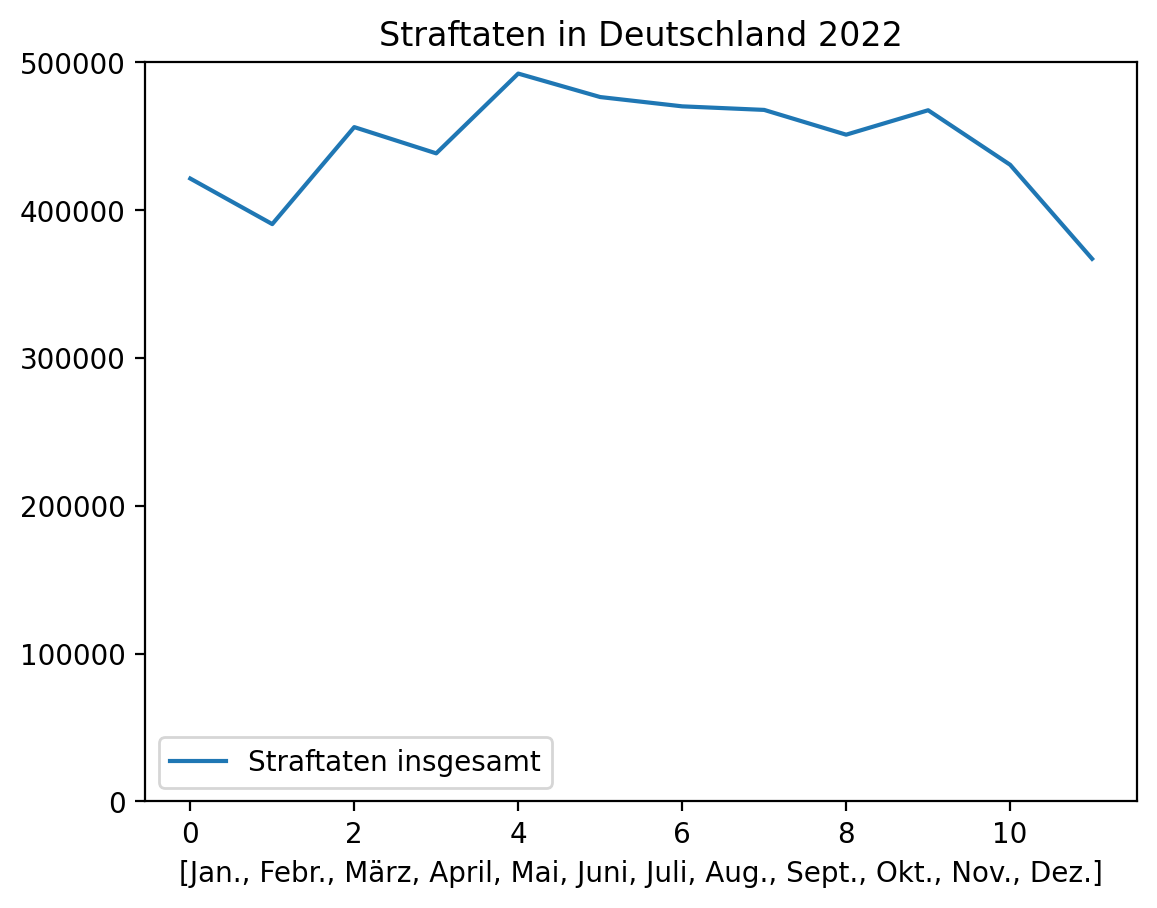

In [6]:
R_BU_T08_T = 'Datasets/PKS/2022/BU-T08-Tatzeit.xlsx'
df = pd.read_excel(R_BU_T08_T,skiprows=4,thousands=',',decimal='.')
df.columns.values[3:15] = df.iloc[0,3:15]
df = df.drop([0,1]).reset_index(drop=True)
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot(xlabel=total.Monat)
plt.title('Straftaten in Deutschland 2022')
ax.set_ylim(0,5e5)
total

In [7]:
from torch.utils.data import Dataset

def load_BU01_2016_2022(fpath):
    df = pd.read_excel(fpath,skiprows=3,thousands=',',decimal='.')
    df = df.rename(columns={
            'erfasste Fälle':'Anzahl erfasste Fälle',
            'erfasste Fälle davon:\nVersuche':'erfasste Fälle: Anzahl Versuche',
            'von Spalte 3\nVersuche':'erfasste Fälle: Anzahl Versuche',
            'Unnamed: 5':'erfasste Fälle: Versuche in %',
            'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
            'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
            'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
            'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
            'Unnamed: 10':'Tatortverteilung: unbekannt',
            'mit Schusswaffe':'mit Schusswaffe: gedroht',
            'Unnamed: 12':'mit Schusswaffe: geschossen',
            'Aufklärung':'Aufklärung: Anzahl Fälle',
            'Unnamed: 14':'Aufklärung: in % (AQ)',
            'Tatverdächtige':'Tatverdächtige: insgesamt',
            'Unnamed: 16':'Tatverdächtige: männlich',
            'Unnamed: 17':'Tatverdächtige: weiblich',
            'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
            'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
    return df.drop(range(4)).reset_index(drop=True)

def load_BU01_2012_2015(fpath):
    df = pd.read_excel(fpath,skiprows=3,thousands=',',decimal='.')
    df = df.rename(columns={
                'Schl.':'Schlüssel', # only applies to 2015
                'Schl.-':'Schlüssel',
                'Unnamed: 1':'Straftat',
                'erfasste Fälle':'Anzahl erfasste Fälle', # 2015
                'Unnamed: 2':'Anzahl erfasste Fälle',
                'Unnamed: 3':'%-Anteil an allen Fällen',
                'Unnamed: 4':'erfasste Fälle: Anzahl Versuche',
                'Unnamed: 5':'erfasste Fälle: Versuche in %',
                'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
                'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
                'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
                'Unnamed: 10':'Tatortverteilung: unbekannt',
                'mit Schusswaffe':'mit Schusswaffe: gedroht',
                'Unnamed: 12':'mit Schusswaffe: geschossen',
                'Aufklärung':'Aufklärung: Anzahl Fälle',
                'Unnamed: 14':'Aufklärung: in % (AQ)',
                'Gesamtzahl':'Tatverdächtige: insgesamt',
                'von Spalte 16':'Tatverdächtige: männlich',
                'Unnamed: 17':'Tatverdächtige: weiblich',
                'Unnamed: 18':'Nichtdeutsche Tatverdächtige: Anzahl',
                'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
    return df.drop(range(4)).reset_index(drop=True)

class DataLoader(Dataset):
    def __init__(self,root_dir:str='Datasets/PKS/'):
        self.root_dir = root_dir

    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self,year:int):
        db = {}
        ypath = os.path.join(self.root_dir,str(year))
        for file in os.listdir(ypath):
            fpath = os.path.join(ypath,file)
            # load different types of tables
            if 'BU-F-08' in file:
                df = pd.read_excel(fpath,skiprows=4,thousands=',',decimal='.')
                df.columns.values[3:15] = df.iloc[0,3:15]
                db['BU-F-08'] = df.drop([0,1]).reset_index(drop=True)
            if any(desi in file for desi in ['BU-T01','BU-F-01','STD-F-01']):
                db['BU-F-01'] = load_BU01_2016_2022(fpath)
            if 'tb01_FaelleGrundtabelle_excel' in file:
                db['BU-F-01'] = load_BU01_2012_2015(fpath)
        return db

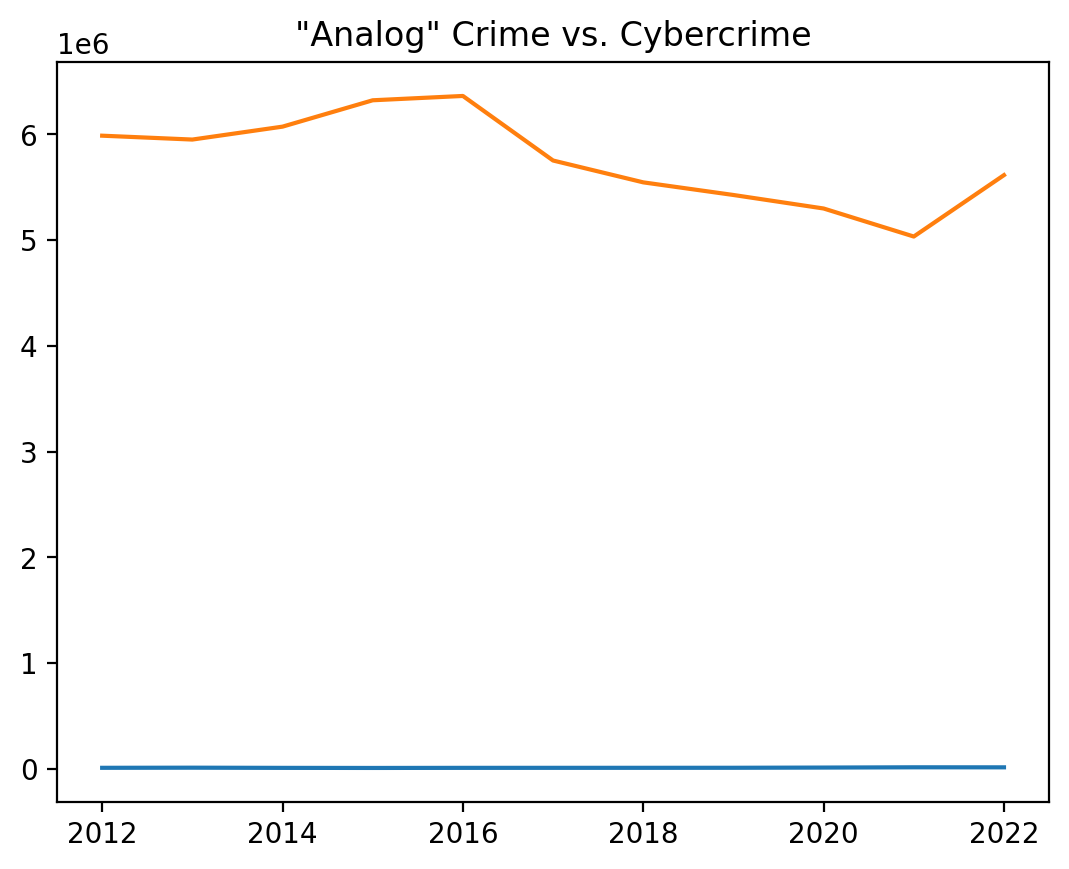

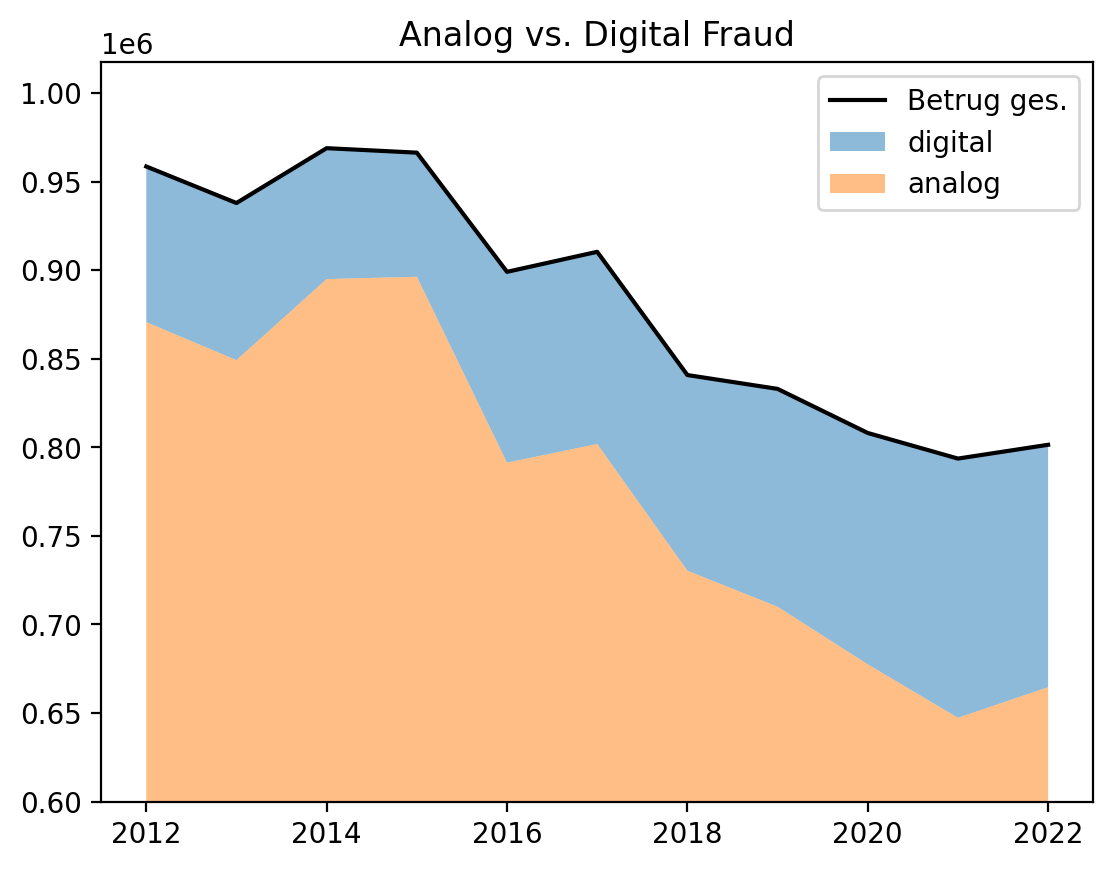

In [8]:
years = range(2012,2023)
db = DataLoader()

# todo: crime vs cybercrime
cybercrime = np.ndarray(11)
crime = np.ndarray(11)
for i,year in enumerate(years):
    df = db[year]['BU-F-01']
    crime[i] = df.loc[df['Schlüssel'] == '------', 'Anzahl erfasste Fälle'].values[0]
    cybercrime[i] = df.loc[df['Schlüssel'] == '543000', 'Anzahl erfasste Fälle'].values[0]
fig,ax = plt.subplots()
ax.plot(years,cybercrime)
ax.plot(years,crime - cybercrime)
ax.set_title('"Analog" Crime vs. Cybercrime')

# todo: betrug vs computerbetrug
computer_betrug = np.ndarray(11)
betrug = np.ndarray(11)
for i,year in enumerate(years):
    df = db[year]['BU-F-01']
    computer_betrug[i] = df.loc[df['Schlüssel'] == '897000', 'Anzahl erfasste Fälle'].values[0]
    betrug[i] = df.loc[df['Schlüssel'] == '510000', 'Anzahl erfasste Fälle'].values[0]
fig,ax = plt.subplots()
ax.plot(years,betrug,c='black')
ax.fill_between(years,betrug,betrug-computer_betrug,alpha=.5)
ax.fill_between(years,betrug-computer_betrug,0,alpha=.5)
ax.set(title='Analog vs. Digital Fraud',ylim=6e5)
ax.legend(['Betrug ges.','digital','analog'])
plt.xticks(rotation=0)
plt.show()

Creating some plots to visualize the relation between vrimes in gerneal and cybercrimes

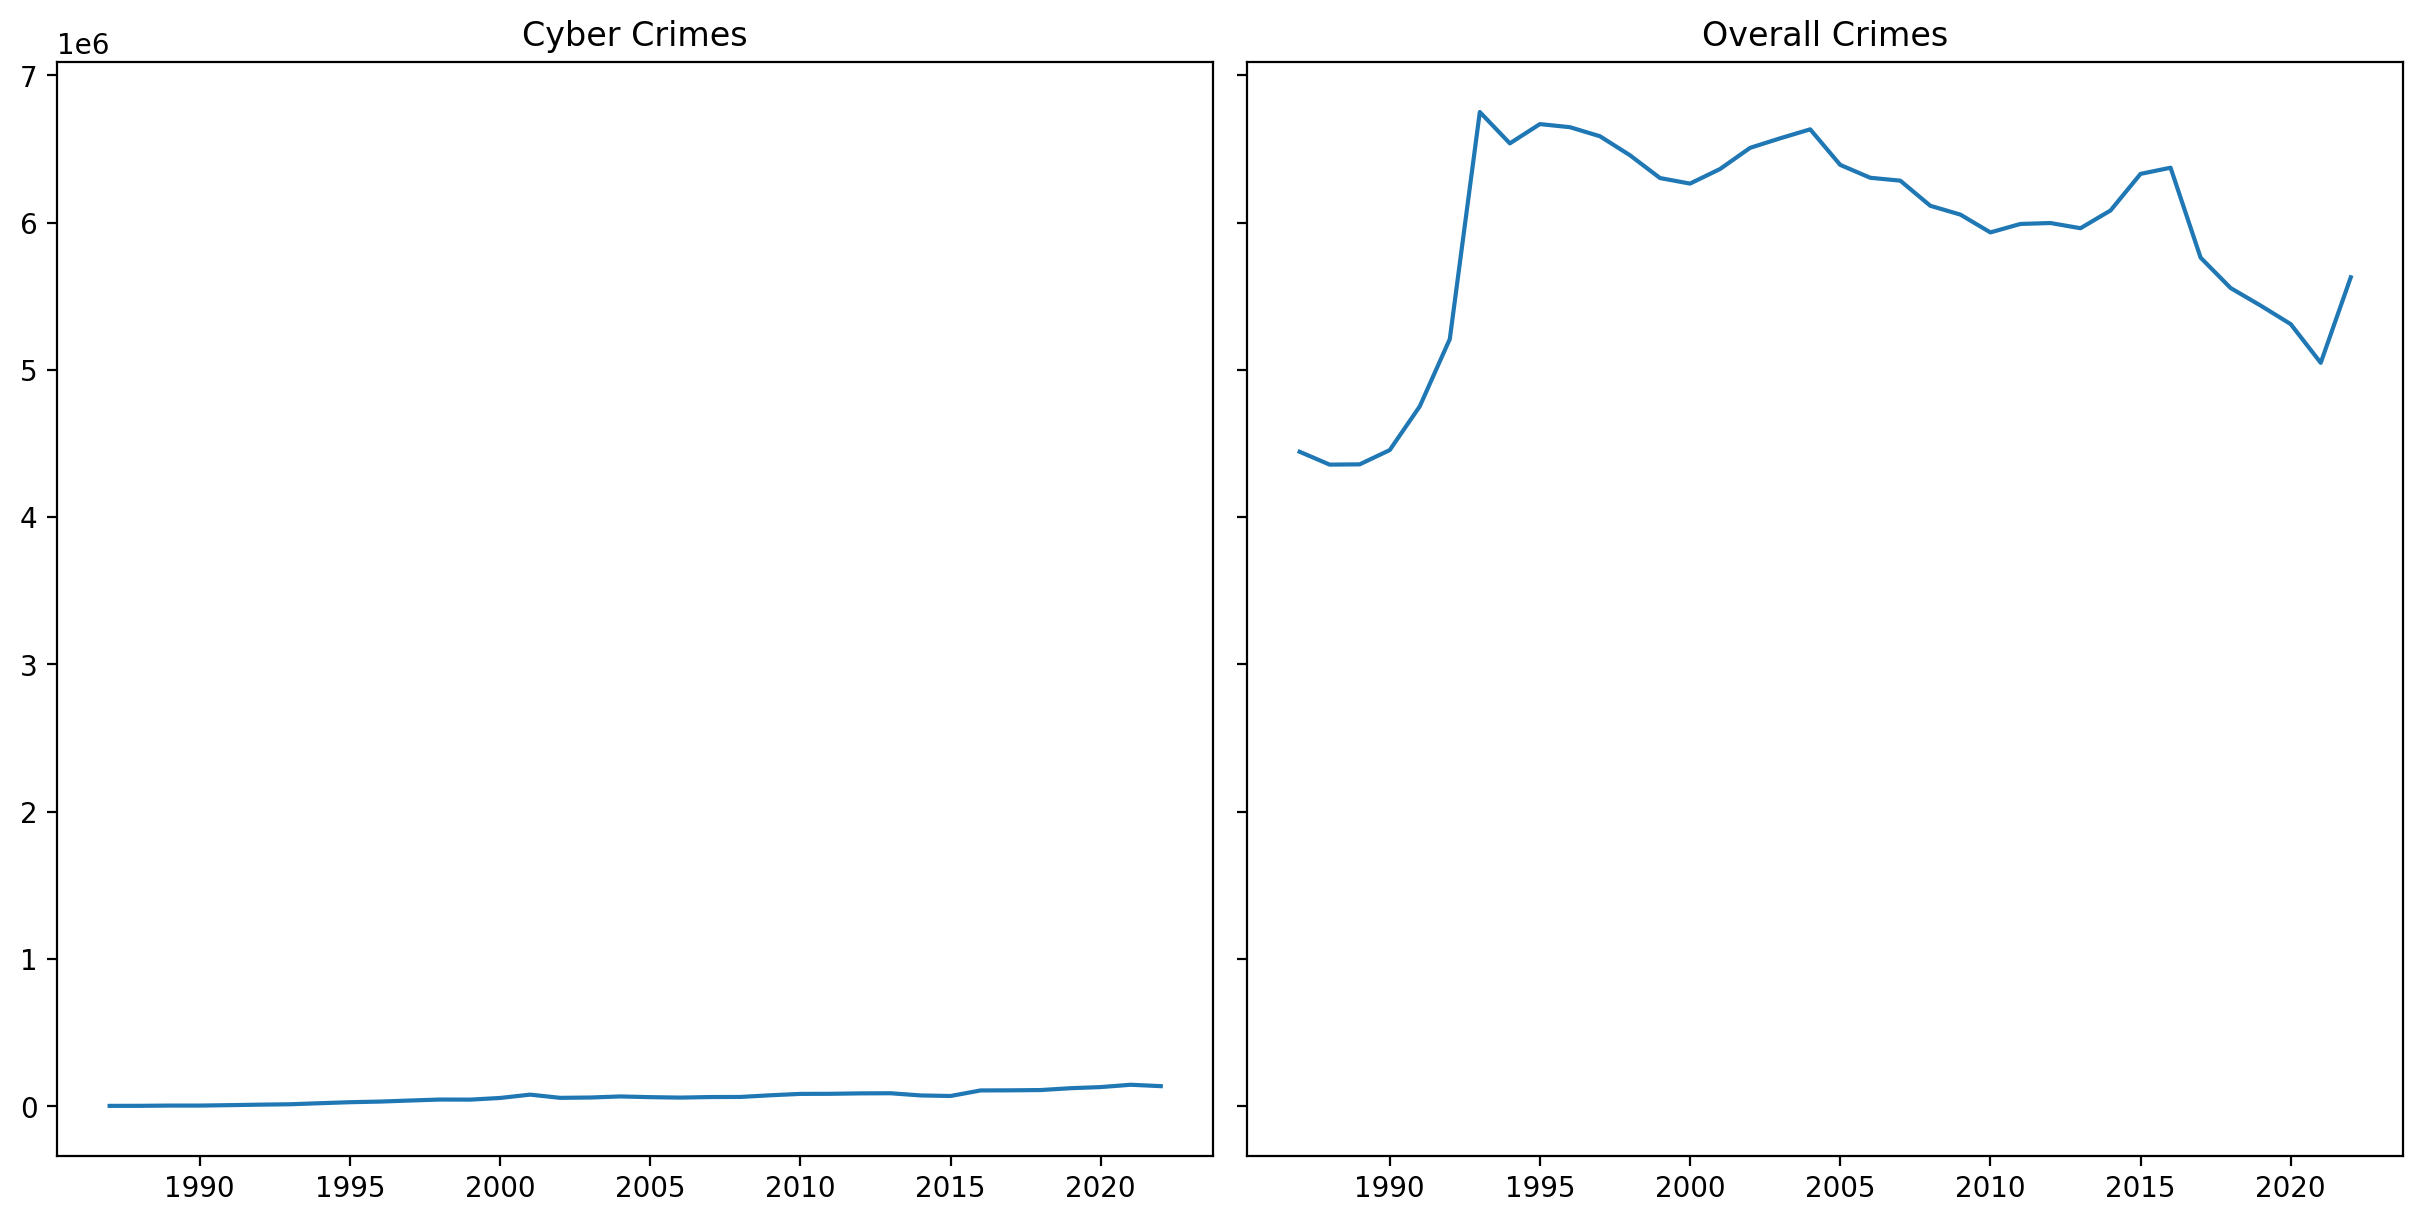

Text(0.5, 0.98, 'Same data & scale, different order :D')

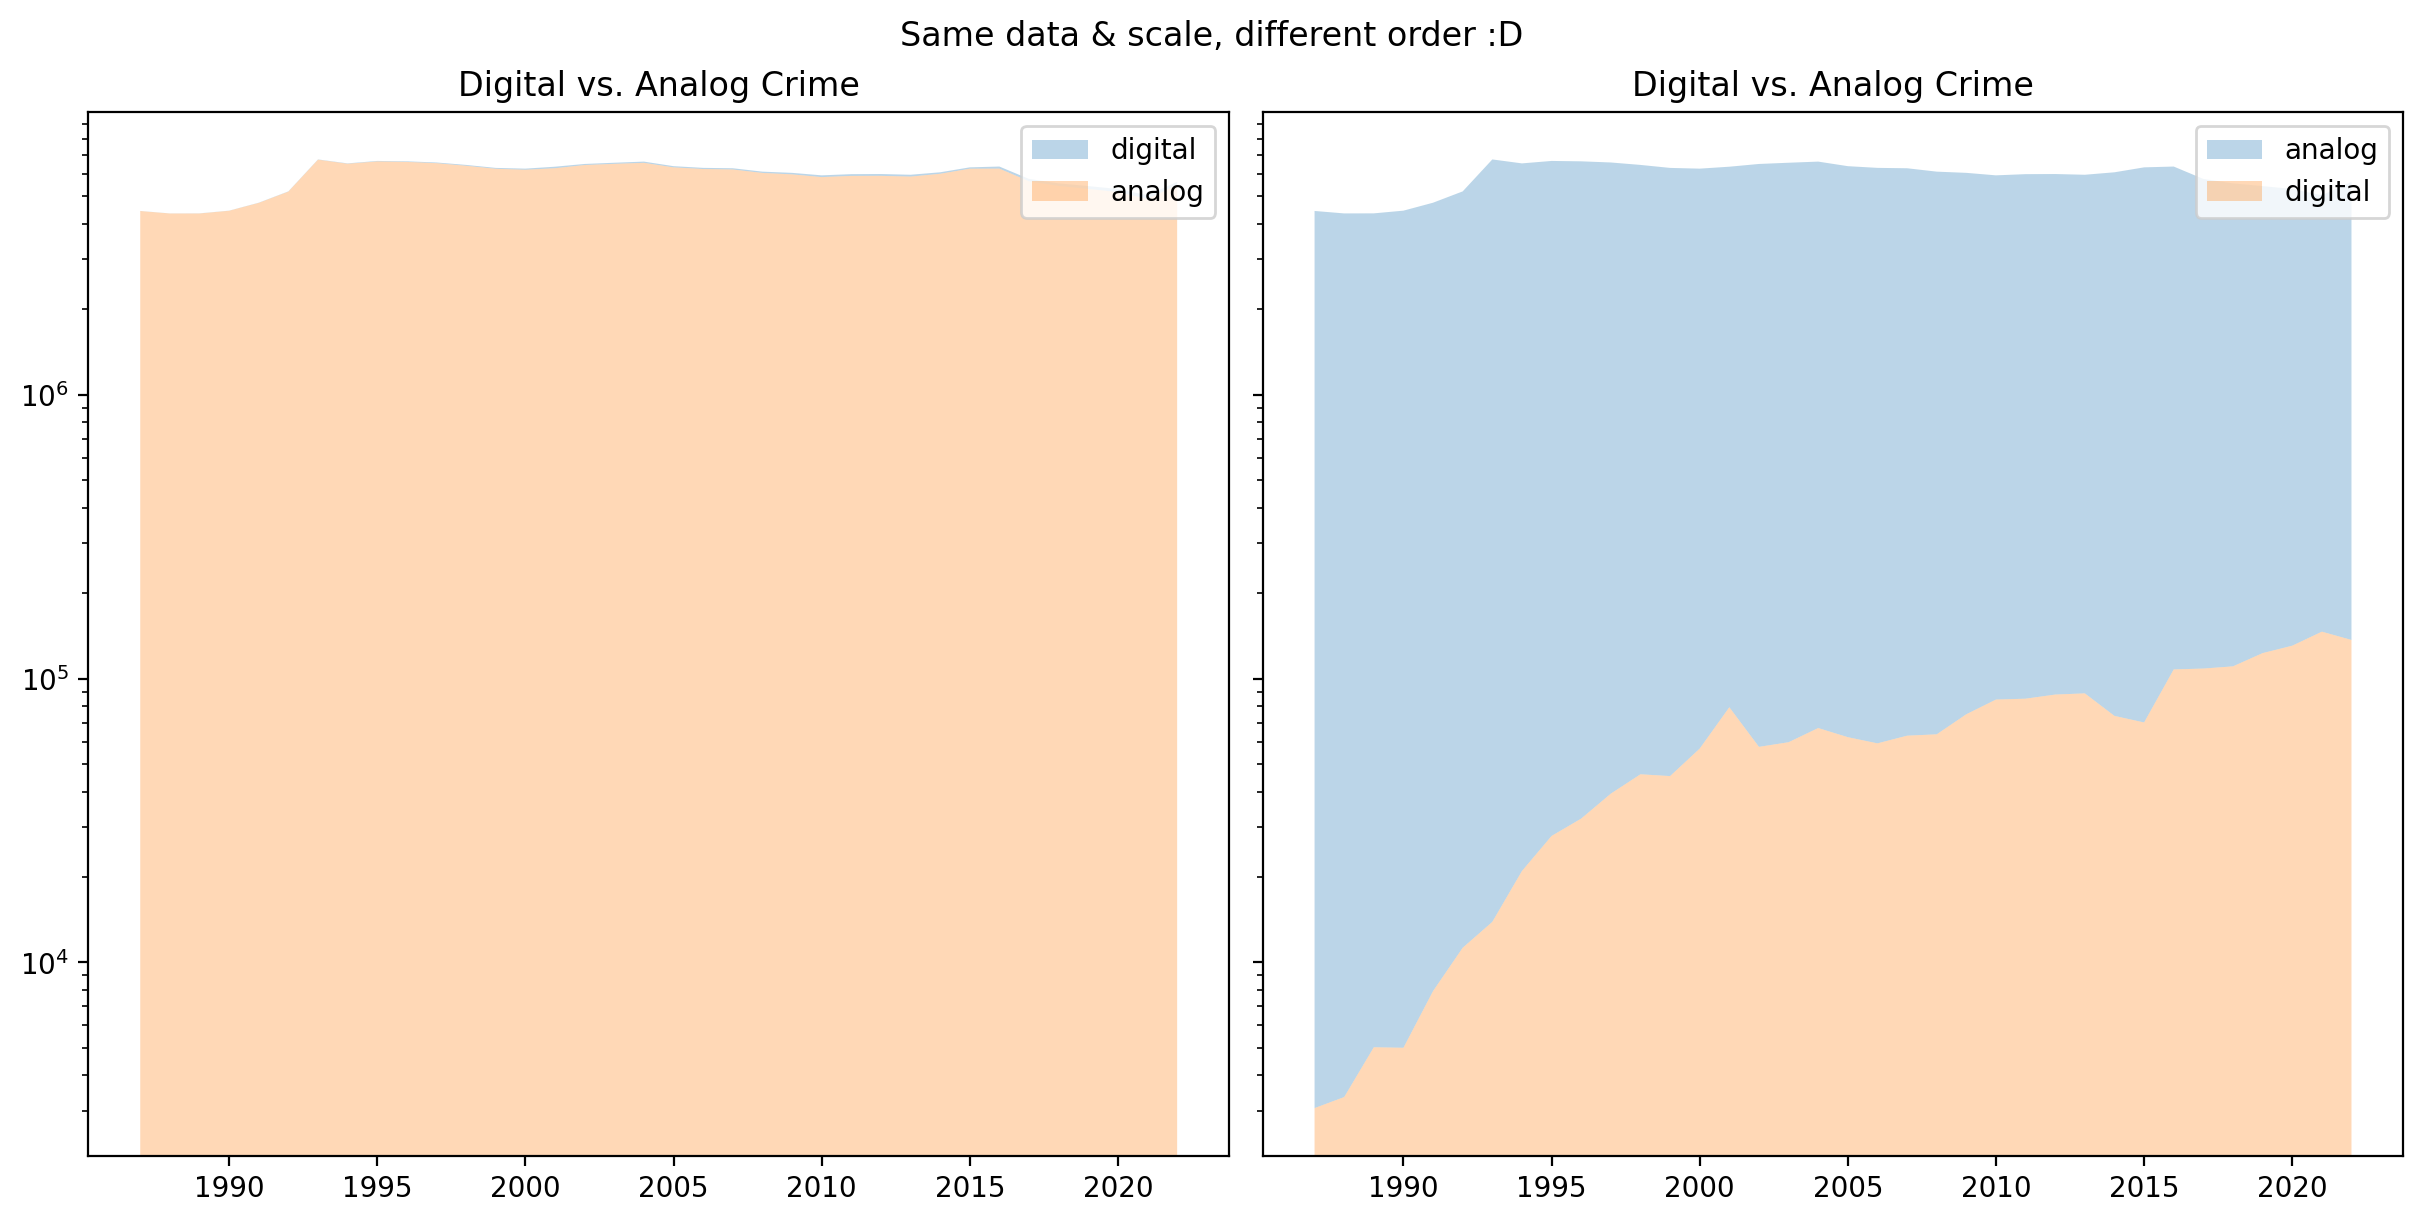

In [9]:
def get_data_times_series(key):
    crime_data = df_z_t01_f[df_z_t01_f['Schluessel'] == key]
    crime_data_years = list(crime_data['Jahr'])
    crime_data_cases = list(crime_data['erfasste Faelle'])
    
    return crime_data, crime_data_years, crime_data_cases


all_crimes, all_crimes_x, all_crimes_y = get_data_times_series('------')
cyber_crimes, cyber_crimes_x, cyber_crimes_y = get_data_times_series('897000')


fig, axs = plt.subplots(1, 2, figsize=(12, 6),sharey=True,layout='constrained')

axs[0].plot(cyber_crimes_x, cyber_crimes_y)
axs[0].set_title('Cyber Crimes')

axs[1].plot(all_crimes_x, all_crimes_y)
axs[1].set_title('Overall Crimes')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 6),sharey=True,layout='constrained')
axs[0].fill_between(all_crimes_x, all_crimes_y,np.asarray(all_crimes_y) - np.asarray(cyber_crimes_y), alpha=.3)
axs[0].fill_between(all_crimes_x, np.asarray(all_crimes_y) - np.asarray(cyber_crimes_y),0,alpha=.3)
axs[0].set(yscale='log',title='Digital vs. Analog Crime')
axs[0].legend(['digital','analog'])

axs[1].fill_between(all_crimes_x, np.asarray(all_crimes_y), np.asarray(cyber_crimes_y),alpha=.3)
axs[1].fill_between(all_crimes_x, np.asarray(cyber_crimes_y),0, alpha=.3)
axs[1].set(yscale='log',title='Digital vs. Analog Crime')
axs[1].legend(['analog','digital'])
fig.suptitle('Same data & scale, different order :D')

What we could say using this type of plot:
1. Overall crime has been almost constant in it's magnitude
2. Cybercrime, although very low in comparison, has grown almost exponentially (linear in log scale) for many years

In [10]:
# Return Pearson product-moment correlation coefficients
print(np.corrcoef(all_crimes_y, cyber_crimes_y))

[[1.         0.15108436]
 [0.15108436 1.        ]]


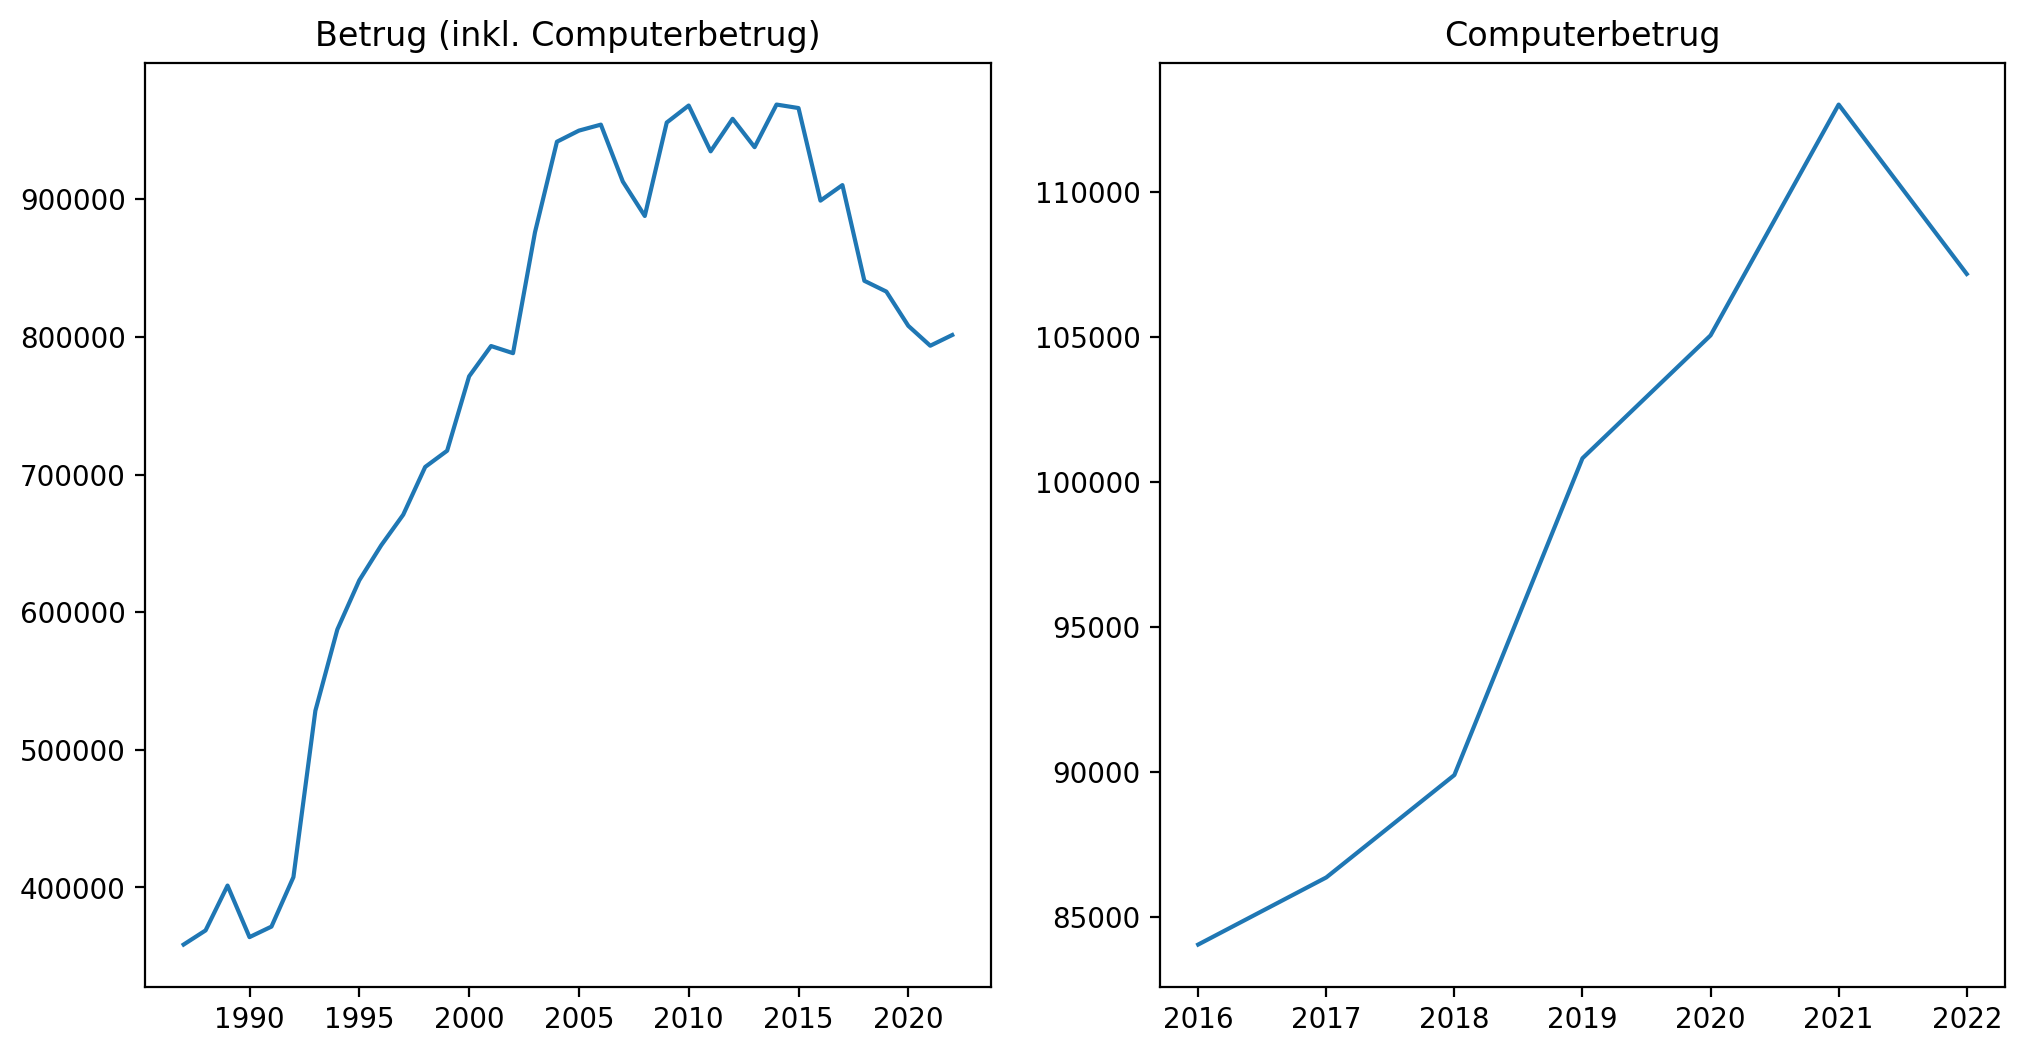

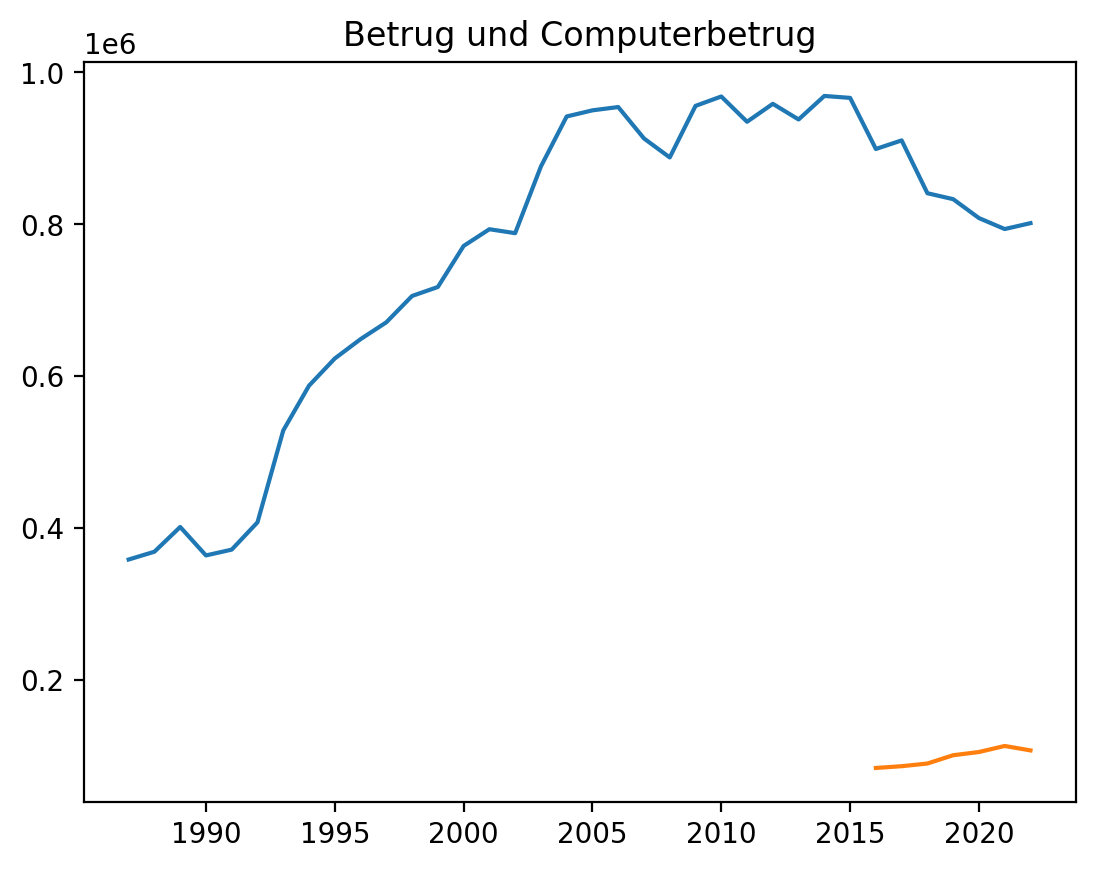

In [11]:
computerbetrug, computerbetrug_x, computerbetrug_y = get_data_times_series('897100')
betrug, betrug_x, betrug_y = get_data_times_series('510000')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(betrug_x, betrug_y)
axs[0].set_title('Betrug (inkl. Computerbetrug)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()

plt.title('Betrug und Computerbetrug')
plt.plot(betrug_x, betrug_y)
plt.plot(computerbetrug_x, computerbetrug_y)

### Relationship between Betrug and Computerbetrug

There seems to be a strong negative correlation between Betrug and Computerbetrug.  
Data for Computerbetrug is only available from 2016


Pearson product-moment correlation coefficients of Betrug and Computerbetrug
[[ 1.         -0.92993189]
 [-0.92993189  1.        ]]


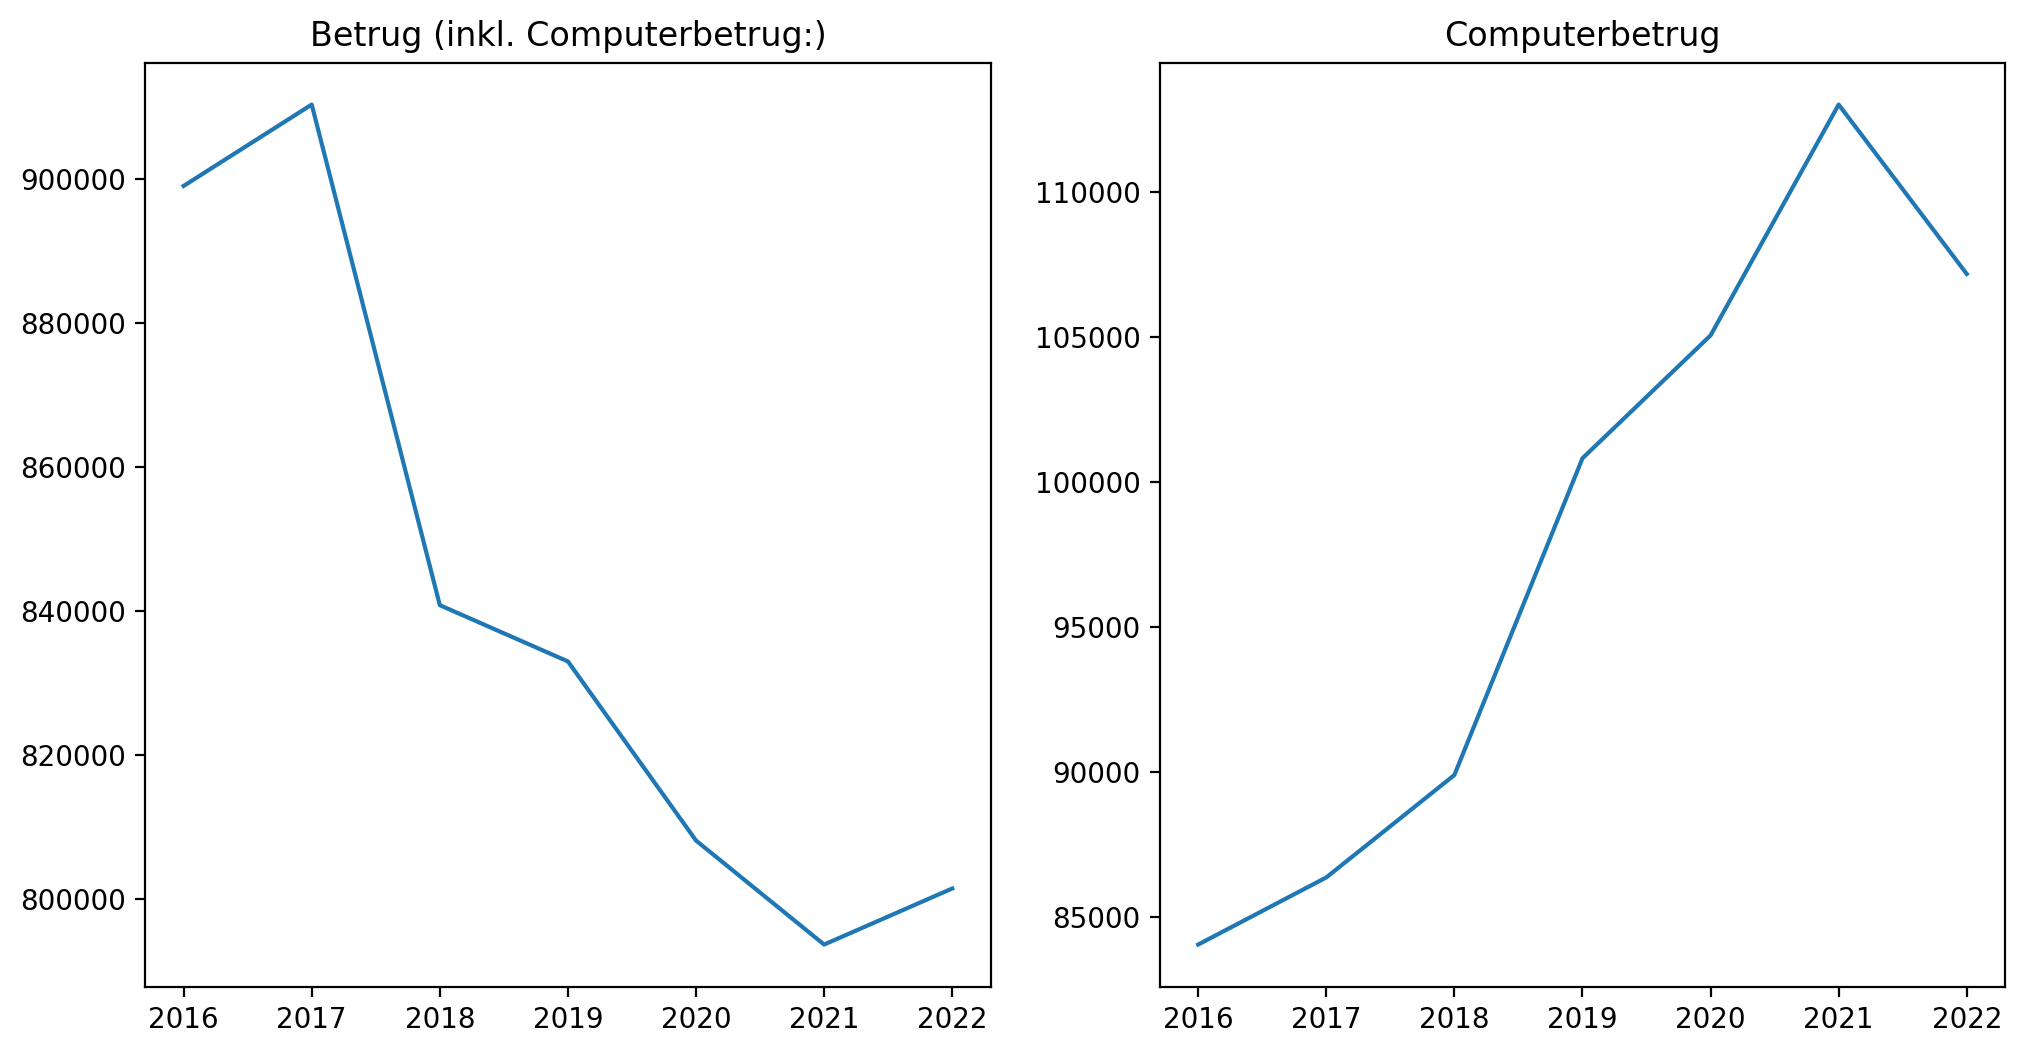

In [12]:
n = len(computerbetrug_y)

# print(betrug_y)
# print(betrug_y[-n:])
# print(computerbetrug_y)

print('Pearson product-moment correlation coefficients of Betrug and Computerbetrug')
print(np.corrcoef(betrug_y[-n:], computerbetrug_y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(computerbetrug_x, betrug_y[-n:])
axs[0].set_title('Betrug (inkl. Computerbetrug:)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()


### Starting to get monthly data for covid years

[[65980, 60773, 60313, 64906, 59479, 57444, 60782, 56254, 54698, 55805, 52140, 41987], [71323, 60840, 54680, 45617, 56073, 59485, 61693, 55538, 53552, 52877, 50203, 41045], [59758, 54334, 61906, 55690, 58860, 55116, 55332, 54433, 53456, 54735, 50676, 40351]]
[['Jan. 2019', 'Febr. 2019', 'März 2019', 'April 2019', 'Mai 2019', 'Juni 2019', 'Juli 2019', 'Aug. 2019', 'Sept. 2019', 'Okt. 2019', 'Nov. 2019', 'Dez. 2019'], ['Jan. 2020', 'Febr. 2020', 'März 2020', 'April 2020', 'Mai 2020', 'Juni 2020', 'Juli 2020', 'Aug. 2020', 'Sept. 2020', 'Okt. 2020', 'Nov. 2020', 'Dez. 2020'], ['Jan. 2021', 'Febr. 2021', 'März 2021', 'April 2021', 'Mai 2021', 'Juni 2021', 'Juli 2021', 'Aug. 2021', 'Sept. 2021', 'Okt. 2021', 'Nov. 2021', 'Dez. 2021']]


/var/folders/1m/z9hsn92n3lg5krkr9rvnljyw0000gn/T/ipykernel_82534/3118948284.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cases_month = int(df[month][df['Schlüssel'] == '510000'])


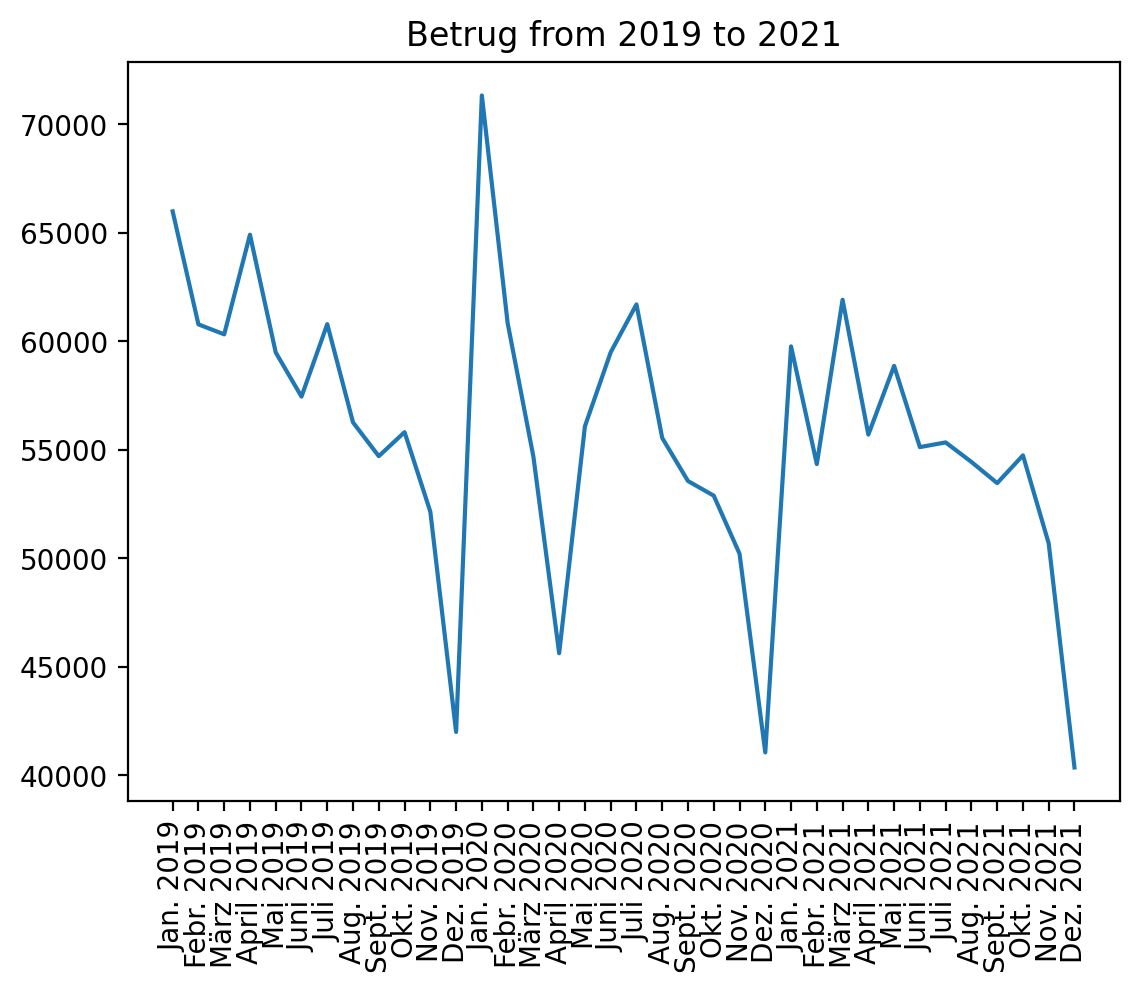

In [14]:
months = ['Jan.', 'Febr.', 'März', 'April', 'Mai', 'Juni', 'Juli', 'Aug.', 'Sept.', 'Okt.', 'Nov.', 'Dez.']
df_years = list()

df_years.append(db[2019]['BU-F-08'])
df_years.append(db[2020]['BU-F-08'])
df_years.append(db[2021]['BU-F-08'])

cases_by_year = list()
for df in df_years:
    cases_curr_year = list()
    for month in months:
        cases_month = int(df[month][df['Schlüssel'] == '510000'])
        cases_curr_year.append(cases_month)
    
    cases_by_year.append(cases_curr_year)

print(cases_by_year)

months_year = list()
for i in range(2019,2022,1):
    with_year = list(month + ' ' + str(i) for month in months)
    months_year.append(with_year)

print(months_year)

flatten_cases = [element for year in cases_by_year for element in year]
flatten_months_year = [element for year in months_year for element in year]

# Development in 2019, 2020, 2021 -> not very beautiful yet
plt.title('Betrug from 2019 to 2021')
plt.xticks(rotation=90)
plt.plot(flatten_months_year, flatten_cases)